In [ ]:
import geopandas as gpd

## loading in the dataset
roads = gpd.read_file("C:/Users/omair/Downloads/texas-251124-free.shp/gis_osm_roads_free_1.shp")
roads.head()

,osm_id,code,fclass,name,ref,oneway,maxspeed,layer,bridge,tunnel,geometry
0,4342988,5111,motorway,Sam Rayburn Tollway,SRT,F,112,0,F,F,"LINESTRING (-97.00107 32.98973, -97.0021 32.99..."
1,4343083,5111,motorway,Sam Rayburn Tollway,SRT,F,112,0,F,F,"LINESTRING (-97.00623 32.99057, -97.00568 32.9..."
2,4343084,5111,motorway,Sam Rayburn Tollway,SRT,F,112,1,T,F,"LINESTRING (-96.99295 32.98645, -96.99329 32.9..."
3,4343087,5131,motorway_link,None,None,F,0,0,F,F,"LINESTRING (-96.99882 32.98826, -96.9981 32.98..."
4,4343088,5131,motorway_link,None,None,F,0,0,F,F,"LINESTRING (-96.99669 32.98806, -96.99731 32.9..."


In [3]:
roads.shape

(3770917, 11)

In [5]:
roads.columns

Index(['osm_id', 'code', 'fclass', 'name', 'ref', 'oneway', 'maxspeed',
       'layer', 'bridge', 'tunnel', 'geometry'],
      dtype='object')

In [7]:
roads['fclass'].value_counts()

fclass
service           1813323
residential        832357
footway            483189
secondary          146779
track              126337
tertiary            84391
primary             50745
unclassified        40700
path                32993
motorway            31029
motorway_link       25680
secondary_link      23476
cycleway            23020
trunk               17893
primary_link         9502
trunk_link           7880
tertiary_link        5500
steps                4682
track_grade5         3550
pedestrian           2198
track_grade3         2026
track_grade4         1581
track_grade2         1265
track_grade1          303
bridleway             295
living_street         153
busway                 48
unknown                22
Name: count, dtype: int64

In [9]:
backbone_classes = [
    "motorway", "trunk", "primary", "secondary", "tertiary",
    "motorway_link", "trunk_link", "primary_link",
    "secondary_link", "tertiary_link",
]

roads_2 = roads[roads["fclass"].isin(backbone_classes)]

In [11]:
roads_2.shape

(402875, 11)

In [15]:
import pandas as pd

In [17]:
pd.set_option('display.max_columns', None)   # show all columns
pd.set_option('display.max_colwidth', None)  # show full column text
pd.set_option('display.width', None)         # no width limit

# Downtown Austin

In [ ]:
import pickle
import networkx as nx

G_austin_dir = pickle.load(open("C:/Users/omair/Downloads/texas-251124-free.shp/austin_central_roads.pkl", "rb"))

G_austin = G_austin_dir.to_directed()

print("Directed?", nx.is_directed(G_austin))
print("# nodes:", G_austin.number_of_nodes())
print("# edges:", G_austin.number_of_edges())

degrees = dict(G_austin.degree())
avg_deg = sum(degrees.values()) / len(degrees)
print("Average degree:", avg_deg)


Directed? True
# nodes: 7373
# edges: 11313
Average degree: 3.068764410687644


In [255]:
# For a directed graph G_austin (nx.DiGraph)

# 1) Use weakly connected components (ignore directions for connectivity)
components = list(nx.weakly_connected_components(G_austin))
print("Number of weakly connected components:", len(components))

# 2) Take the largest one = main road blob
largest_cc = max(components, key=len)
G_main = G_austin.subgraph(largest_cc).copy()

print("# nodes in main component:", G_main.number_of_nodes())
print("# edges in main component:", G_main.number_of_edges())

# 3) Degree on a directed graph = in-degree + out-degree
deg_main = dict(G_main.degree())   # total degree
avg_deg_main = sum(deg_main.values()) / len(deg_main)
print("Average total degree (main component):", avg_deg_main)

out_deg = dict(G_main.out_degree())
in_deg  = dict(G_main.in_degree())

avg_out = sum(out_deg.values()) / len(out_deg)
avg_in  = sum(in_deg.values()) / len(in_deg)

print("Average out-degree (main component):", avg_out)
print("Average in-degree  (main component):", avg_in)



Number of weakly connected components: 1288
# nodes in main component: 4268
# edges in main component: 7792
Average total degree (main component): 3.6513589503280226
Average out-degree (main component): 1.8256794751640113
Average in-degree  (main component): 1.8256794751640113


In [258]:
# degree centrality
deg_cent = nx.degree_centrality(G_main)
top_deg = sorted(deg_cent.items(), key=lambda x: x[1], reverse=True)[:20]
for node, val in top_deg:
    print("node:", node, "degree:", G_main.degree(node), "degree centrality:", val)


node: (-10878132.191169342, 3544006.7039943035) degree: 10 degree centrality: 0.002343566908835247
node: (-10876813.945759367, 3543544.0236157076) degree: 9 degree centrality: 0.0021092102179517225
node: (-10879925.759673053, 3541290.025576082) degree: 9 degree centrality: 0.0021092102179517225
node: (-10882135.451565301, 3543299.298966479) degree: 8 degree centrality: 0.0018748535270681978
node: (-10881424.565297095, 3537896.6672202493) degree: 8 degree centrality: 0.0018748535270681978
node: (-10880833.447669033, 3542081.522911235) degree: 8 degree centrality: 0.0018748535270681978
node: (-10879393.296284692, 3542710.839331587) degree: 8 degree centrality: 0.0018748535270681978
node: (-10878424.0931381, 3537228.8354505794) degree: 8 degree centrality: 0.0018748535270681978
node: (-10884714.401340459, 3542191.3470650944) degree: 8 degree centrality: 0.0018748535270681978
node: (-10884886.523537124, 3542286.886345458) degree: 8 degree centrality: 0.0018748535270681978
node: (-10879386.

In [259]:
bet = nx.betweenness_centrality(
    G_main,
    k=200,
    weight="travel_time_s",
    seed=0
)

top_bet = sorted(bet.items(), key=lambda x: x[1], reverse=True)[:20]
for node, val in top_bet:
    print("node:", node, "betweenness:", val)


node: (-10881308.603783535, 3536841.2034721985) betweenness: 0.15236457880455234
node: (-10881257.942283275, 3537576.292776327) betweenness: 0.15045484865095476
node: (-10880874.157206817, 3537452.1252105352) betweenness: 0.13779365426246257
node: (-10881132.351633763, 3536646.3158207787) betweenness: 0.13281944613372437
node: (-10880524.480422337, 3540849.4639192782) betweenness: 0.1249976416003892
node: (-10880532.239390844, 3540761.425623768) betweenness: 0.11906798222844536
node: (-10880581.487133574, 3539815.0365376514) betweenness: 0.11797654037884478
node: (-10880583.435224662, 3540082.536746914) betweenness: 0.11724617703587899
node: (-10880595.580181107, 3539935.25688497) betweenness: 0.11639154641465575
node: (-10880528.354340617, 3540806.379352495) betweenness: 0.11633175744115455
node: (-10880526.339457832, 3540829.778044249) betweenness: 0.11627196846765334
node: (-10880598.697126849, 3539878.356398018) betweenness: 0.11609142921433595
node: (-10882096.088993357, 3537838.2

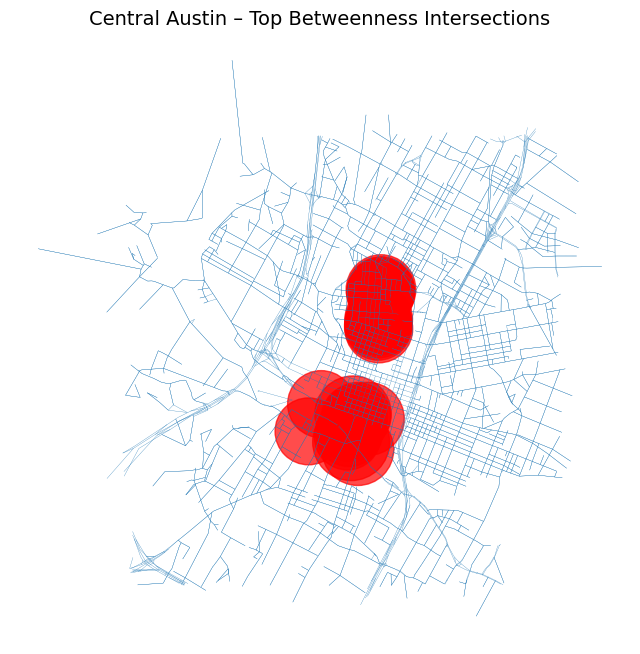

In [260]:
import geopandas as gpd
from shapely.geometry import LineString, Point
import matplotlib.pyplot as plt

BBOX_AUSTIN = (-97.8, -97.7, 30.23, 30.32)
lon_min, lon_max, lat_min, lat_max = BBOX_AUSTIN

roads_a = gpd.read_file(
    "C:/Users/omair/Downloads/texas-251124-free.shp/gis_osm_roads_free_1.shp",
    bbox=(lon_min, lat_min, lon_max, lat_max)
)

backbone_classes = [
    "motorway", "trunk", "primary", "secondary", "tertiary",
    "motorway_link", "trunk_link", "primary_link",
    "secondary_link", "tertiary_link",
    "unclassified", "residential", "living_street",
]

roads_a = roads_a[roads_a["fclass"].isin(backbone_classes)]
roads_3857 = roads_a.to_crs(epsg=3857)

# edges from G_main
edge_records = []
for u, v, data in G_main.edges(data=True):
    edge_records.append({
        "u": u,
        "v": v,
        "highway": data.get("highway"),
        "geometry": LineString([u, v]),
    })

edges_gdf = gpd.GeoDataFrame(edge_records, geometry="geometry", crs="EPSG:3857")

# nodes (top betweenness)
node_records = []
for (x, y), val in top_bet:
    node_records.append({
        "x": x,
        "y": y,
        "betweenness": val,
        "geometry": Point(x, y),
    })
nodes_top_bet = gpd.GeoDataFrame(node_records, geometry="geometry", crs="EPSG:3857")

fig, ax = plt.subplots(figsize=(8, 8))
edges_gdf.plot(ax=ax, linewidth=0.2)
nodes_top_bet.plot(
    ax=ax,
    markersize=20 + 20000 * nodes_top_bet["betweenness"],
    color="red",
    alpha=0.7,
)
ax.set_title("Central Austin – Top Betweenness Intersections", fontsize=14)
ax.set_axis_off()
plt.show()


In [341]:
print("Central Austin (G_main) summary:")
print("  # nodes:", G_main.number_of_nodes())
print("  # edges:", G_main.number_of_edges())


Central Austin (G_main) summary:
  # nodes: 4268
  # edges: 7792


6789 road segments in Central Austin


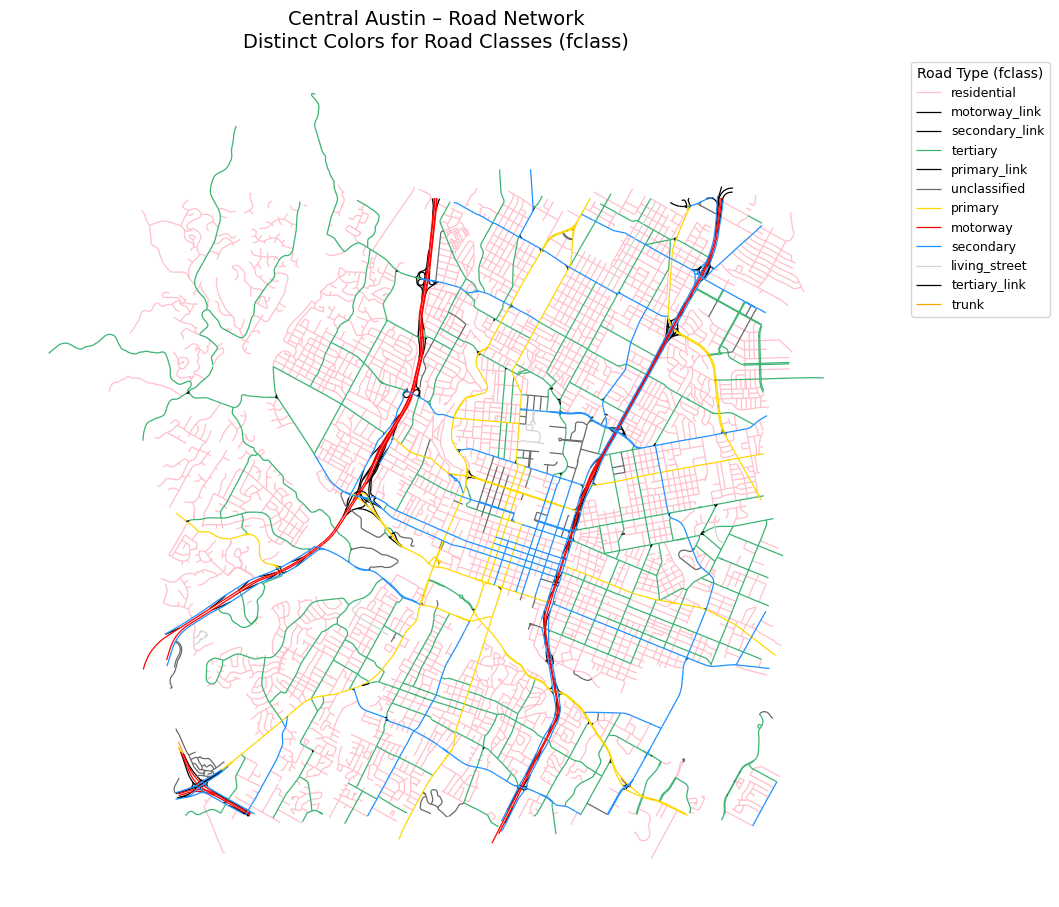

In [333]:
from matplotlib import pyplot as plt

# --- Central Austin bounding box (you already defined this) ---
austin_bbox = BBOX_AUSTIN  # (-97.8, -97.7, 30.23, 30.32)

# roads_a is already filtered to that bbox and backbone_classes.
print(len(roads_a), "road segments in Central Austin")

# Project to 3857 for plotting
austin_proj = roads_a.to_crs(epsg=3857)

# CUSTOM color palette (same style as Leander)
color_map = {
    "motorway": "red",
    "trunk": "orange",
    "primary": "gold",
    "secondary": "dodgerblue",
    "tertiary": "mediumseagreen",
    
    # Minor roads
    "residential": "pink",
    "unclassified": "dimgray",
    "living_street": "lightgray",
    "service": "lightgray",
    
    # Tracks (may or may not appear in Austin bbox)
    "track": "saddlebrown",
    "track_grade1": "saddlebrown",
    "track_grade2": "sienna",
    "track_grade3": "peru",
    "track_grade4": "tan",
    "track_grade5": "wheat",

    # Walking/bike
    "cycleway": "purple",
    "footway": "forestgreen",
    "path": "darkgreen",
    "bridleway": "darkcyan",
}

# fallback color if type not in dict
default_color = "black"

# Determine unique road classes actually present in Austin
road_types = austin_proj["fclass"].unique()

# Plot
fig, ax = plt.subplots(figsize=(11, 11))

for rtype in road_types:
    subset = austin_proj[austin_proj["fclass"] == rtype]
    clr = color_map.get(rtype, default_color)
    subset.plot(ax=ax, color=clr, linewidth=0.9, label=rtype)

ax.set_title(
    "Central Austin – Road Network\nDistinct Colors for Road Classes (fclass)",
    fontsize=14
)
ax.set_axis_off()

# Legend outside the map
ax.legend(
    title="Road Type (fclass)",
    loc="upper left",
    bbox_to_anchor=(1.05, 1),
    fontsize=9
)

plt.show()


In [261]:
# name column (could be 'name' or 'name_left')
name_col = "name" if "name" in roads_3857.columns else "name_left"

def get_street_names(point, roads_gdf, radius=30):
    buf = point.buffer(radius)
    nearby = roads_gdf[roads_gdf.intersects(buf)]
    names = sorted(set(nearby[name_col].dropna()))
    if not names:
        return "Unnamed road"
    return " & ".join(names[:4])

top_node, top_bet_val = top_bet[0]
top_point = Point(top_node)

street_names = get_street_names(top_point, roads_3857, radius=30)
print("Most critical intersection in central Austin:")
print("  Coordinates:", top_node)
print("  Streets:", street_names)
print("  Betweenness:", top_bet_val)


Most critical intersection in central Austin:
  Coordinates: (-10881308.603783535, 3536841.2034721985)
  Streets: Barton Springs Road & East Riverside Drive
  Betweenness: 0.15236457880455234


In [263]:
import random

def approx_global_efficiency(G, weight=None, k_sources=200, seed=0):
    rng = random.Random(seed)
    nodes = list(G.nodes())
    n = len(nodes)
    if n <= 1:
        return 0.0

    k_sources = min(k_sources, n)
    sources = rng.sample(nodes, k_sources)

    total_inv = 0.0
    count = 0

    for s in sources:
        if weight is None:
            lengths = nx.single_source_shortest_path_length(G, s)
        else:
            lengths = nx.single_source_dijkstra_path_length(G, s, weight=weight)
        for t, d in lengths.items():
            if t == s or d <= 0:
                continue
            total_inv += 1.0 / d
            count += 1

    if count == 0:
        return 0.0

    return total_inv / count

base_eff = approx_global_efficiency(G_main, weight="travel_time_s", k_sources=200, seed=0)
print("Baseline approximate global efficiency (Austin):", base_eff)


Baseline approximate global efficiency (Austin): 0.004258743128767823


In [264]:
# Closeness centrality for Austin main component (using travel time as distance)
closeness = nx.closeness_centrality(G_main, distance="travel_time_s")


In [384]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import networkx as nx

# Treat G_main as the Austin main component
G_austin_main = G_main


In [436]:
import networkx as nx
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point

# ==========================
# Overall centrality score for AUSTIN (G_main)
# ==========================

print("Computing degree centrality (Austin)...")
deg_austin = nx.degree_centrality(G_main)

print("Computing closeness centrality (travel time, Austin)...")
clo_austin = nx.closeness_centrality(
    G_main,
    distance="travel_time_s"
)

print("Computing betweenness centrality (sampled, travel time, Austin)...")
btw_austin = nx.betweenness_centrality(
    G_main,
    k=min(500, G_main.number_of_nodes()),
    weight="travel_time_s",
    seed=0
)

# Combine into one table
centrality_df_austin = pd.DataFrame({
    "node": list(G_main.nodes())
})
centrality_df_austin["degree"] = centrality_df_austin["node"].map(deg_austin)
centrality_df_austin["closeness"] = centrality_df_austin["node"].map(clo_austin)
centrality_df_austin["betweenness"] = centrality_df_austin["node"].map(btw_austin)

# Normalized z-scores
for col in ["degree", "closeness", "betweenness"]:
    mu = centrality_df_austin[col].mean()
    sd = centrality_df_austin[col].std() if centrality_df_austin[col].std() > 0 else 1.0
    centrality_df_austin[col + "_z"] = (centrality_df_austin[col] - mu) / sd

centrality_df_austin["centrality_score"] = (
    centrality_df_austin["degree_z"] +
    centrality_df_austin["closeness_z"] +
    centrality_df_austin["betweenness_z"]
)

centrality_df_austin.sort_values("centrality_score", ascending=False, inplace=True)

# Small dicts for quick lookup in loops
centrality_score_dict = dict(
    zip(centrality_df_austin["node"], centrality_df_austin["centrality_score"])
)

# (optional) hubs table with names
top_k = 50
top_hubs_austin = centrality_df_austin.head(top_k).copy()

gdf_hubs_austin = gpd.GeoDataFrame(
    top_hubs_austin,
    geometry=[Point(xy) for xy in top_hubs_austin["node"]],
    crs="EPSG:3857"
)

gdf_hubs_austin = gpd.sjoin_nearest(
    gdf_hubs_austin,
    roads_3857[[road_name_col, "geometry"]],
    how="left",
    distance_col="dist_nearest",
    max_distance=50
)
gdf_hubs_austin["road_name"] = gdf_hubs_austin[road_name_col].fillna("Unnamed road")
gdf_hubs_austin.drop(columns=[road_name_col], inplace=True)

gdf_hubs_austin["intersection_names"] = gdf_hubs_austin.geometry.apply(
    lambda p: get_intersection_names(p, roads_3857, radius=30)
)

gdf_hubs_unique_austin = (
    gdf_hubs_austin
    .sort_values("centrality_score", ascending=False)
    .drop_duplicates(subset="intersection_names")
)

central_hub_table_austin = gdf_hubs_unique_austin[
    ["intersection_names", "degree", "closeness",
     "betweenness", "centrality_score"]
].sort_values("centrality_score", ascending=False)

central_hub_table_austin.head()


Computing degree centrality (Austin)...
Computing closeness centrality (travel time, Austin)...
Computing betweenness centrality (sampled, travel time, Austin)...


,intersection_names,degree,closeness,betweenness,centrality_score
2546,Barton Springs Road & East Riverside Drive,0.001875,0.003700,0.157227,10.300216
249,Congress Avenue & East Cesar Chavez Street & West Cesar Chavez Street,0.001875,0.003934,0.145935,10.047247
1597,Guadalupe Street & South 1st Street & West Cesar Chavez Street,0.001406,0.003938,0.148236,9.004733
3147,Barton Springs Road & South 1st Street,0.001875,0.003644,0.124416,8.724419
2148,Barton Springs Road & South Lamar Boulevard,0.001875,0.003310,0.130064,8.602779


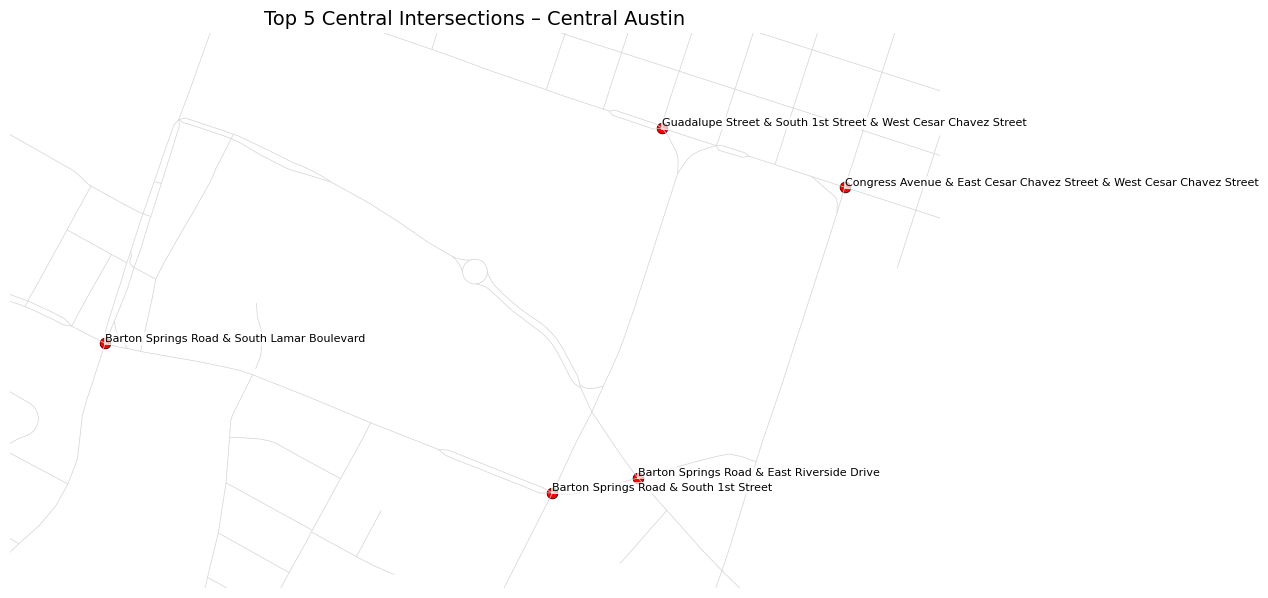

In [387]:
import matplotlib.pyplot as plt

# Sort hubs by overall centrality score and take top 5
gdf_hubs_sorted_austin = gdf_hubs_unique_austin.sort_values(
    "centrality_score",
    ascending=False
)
top5_austin = gdf_hubs_sorted_austin.head(5).copy()

fig, ax = plt.subplots(figsize=(12, 12))

# 1) Background: central Austin road network
roads_3857.plot(ax=ax, color="lightgray", linewidth=0.5)

# 2) Overlay: top 5 central intersections (big red points)
top5_austin.plot(
    ax=ax,
    color="red",
    markersize=60,
    edgecolor="black",
    linewidth=0.5
)

# 3) Label each point with its intersection name
for _, row in top5_austin.iterrows():
    x = row.geometry.x
    y = row.geometry.y
    label = row["intersection_names"]
    ax.text(
        x, y,
        label,
        fontsize=8,
        ha="left",
        va="bottom",
        color="black",
        bbox=dict(facecolor="white", edgecolor="none", alpha=0.7, pad=1.0),
    )

# 4) Zoom in around the top hubs
minx, miny, maxx, maxy = top5_austin.total_bounds
pad = 200  # meters of padding around the hubs
ax.set_xlim(minx - pad, maxx + pad)
ax.set_ylim(miny - pad, maxy + pad)

ax.set_title("Top 5 Central Intersections – Central Austin", fontsize=14)
ax.set_axis_off()

plt.show()


## Question 2

### Node Closure

In [390]:
if "name" in roads_3857.columns:
    road_name_col = "name"
elif "name_left" in roads_3857.columns:
    road_name_col = "name_left"
else:
    road_name_col = None


In [391]:
def get_intersection_names(point, roads_gdf, radius=30):
    buf = point.buffer(radius)
    nearby = roads_gdf[roads_gdf.intersects(buf)]
    if road_name_col is None:
        return "Unknown roads"
    names = sorted(set(nearby[road_name_col].dropna()))
    if not names:
        return "Unnamed road"
    return " & ".join(names[:4])

def get_main_road_name(point, roads_gdf, radius=30):
    buf = point.buffer(radius)
    nearby = roads_gdf[roads_gdf.intersects(buf)]
    if nearby.empty:
        return "Unknown"
    if road_name_col is not None:
        named = nearby[nearby[road_name_col].notna()]
        if not named.empty:
            return str(named.iloc[0][road_name_col])
    if "fclass" in nearby.columns:
        return str(nearby.iloc[0]["fclass"])
    return "Unknown"


In [392]:
# ==========================
# Node closures: top-10 betweenness intersections
# ==========================

k_nodes = 10
top_bet_nodes = sorted(
    btw_austin.items(),
    key=lambda x: x[1],
    reverse=True
)[:k_nodes]

rows = []
for (node, bval) in top_bet_nodes:
    print("Evaluating node closure:", node, "betweenness:", bval)
    
    # Simulate closing this intersection
    G_closed = G_main.copy()
    if node in G_closed:
        G_closed.remove_node(node)

    # Efficiency after closure
    eff_closed = approx_global_efficiency(
        G_closed,
        weight="travel_time_s",
        k_sources=200,
        seed=0
    )
    eff_drop_pct = 0.0
    if base_eff > 0:
        eff_drop_pct = 100.0 * (base_eff - eff_closed) / base_eff

    # Geometry + names
    pt = Point(node)
    intersection_names = get_intersection_names(pt, roads_3857, radius=30)
    main_road = get_main_road_name(pt, roads_3857, radius=30)

    rows.append({
        "node": node,
        "intersection_names": intersection_names,
        "road_name": main_road,
        "degree": deg_austin[node],
        "closeness": clo_austin[node],
        "betweenness": btw_austin[node],
        "centrality_score": centrality_score_dict[node],
        "eff_drop_pct": eff_drop_pct,
        "geometry": pt,
    })

node_closures_austin = pd.DataFrame(rows)

node_closures_austin_sorted = node_closures_austin.sort_values(
    "eff_drop_pct",
    ascending=False
)

# Top 10 most impactful node closures (with centrality scores)
top_nodes_gdf = gpd.GeoDataFrame(
    node_closures_austin_sorted.head(10),
    geometry="geometry",
    crs="EPSG:3857"
)

top_nodes_gdf[
    ["intersection_names",
     "road_name",
     "degree",
     "closeness",
     "betweenness",
     "centrality_score",
     "eff_drop_pct"]
]


Evaluating node closure: (-10881308.603783535, 3536841.2034721985) betweenness: 0.15722671191629609
Evaluating node closure: (-10881257.942283275, 3537576.292776327) betweenness: 0.14823632603421563
Evaluating node closure: (-10880874.157206817, 3537452.1252105352) betweenness: 0.14593480225426306
Evaluating node closure: (-10882428.700499898, 3537123.951842634) betweenness: 0.13006376062172534
Evaluating node closure: (-10880524.480422337, 3540849.4639192782) betweenness: 0.12627571883393868
Evaluating node closure: (-10881488.58513625, 3536809.9248459) betweenness: 0.12441639899133232
Evaluating node closure: (-10880581.487133574, 3539815.0365376514) betweenness: 0.122481111982395
Evaluating node closure: (-10881132.351633763, 3536646.3158207787) betweenness: 0.12172237818533647
Evaluating node closure: (-10880532.239390844, 3540761.425623768) betweenness: 0.11968955308629523
Evaluating node closure: (-10880595.580181107, 3539935.25688497) betweenness: 0.1176149929390845


,intersection_names,road_name,degree,closeness,betweenness,centrality_score,eff_drop_pct
2,Congress Avenue & East Cesar Chavez Street & West Cesar Chavez Street,East Cesar Chavez Street,0.001875,0.003934,0.145935,10.047247,4.622795
6,Guadalupe Street & West Martin Luther King Jr Boulevard,Guadalupe Street,0.001640,0.003866,0.122481,8.313074,4.037031
8,Guadalupe Street & West 25th Street,West 25th Street,0.001406,0.003712,0.119690,7.431878,2.699677
3,Barton Springs Road & South Lamar Boulevard,South Lamar Boulevard,0.001875,0.003310,0.130064,8.602779,2.617376
7,East Riverside Drive & South Congress Avenue,East Riverside Drive,0.001875,0.003641,0.121722,8.597229,2.370894
1,Guadalupe Street & South 1st Street & West Cesar Chavez Street,West Cesar Chavez Street,0.001406,0.003938,0.148236,9.004733,2.320631
9,Guadalupe Street & West 20th Street,West 20th Street,0.001406,0.003828,0.117615,7.468423,2.273862
4,Guadalupe Street & West Dean Keeton Street,West Dean Keeton Street,0.001172,0.003695,0.126276,7.138367,1.768320
0,Barton Springs Road & East Riverside Drive,Barton Springs Road,0.001875,0.003700,0.157227,10.300216,0.774009
5,Barton Springs Road & South 1st Street,South 1st Street,0.001875,0.003644,0.124416,8.724419,-0.118885


In [393]:
node_closures_austin_sorted = node_closures_austin.sort_values(
    "eff_drop_pct",
    ascending=False
)

# Top 10 most impactful node closures
top_nodes_gdf = gpd.GeoDataFrame(
    node_closures_austin_sorted.head(10),
    geometry="geometry",
    crs="EPSG:3857"
)

top_nodes_gdf[["intersection_names", "road_name", "betweenness", "eff_drop_pct"]]


,intersection_names,road_name,betweenness,eff_drop_pct
2,Congress Avenue & East Cesar Chavez Street & West Cesar Chavez Street,East Cesar Chavez Street,0.145935,4.622795
6,Guadalupe Street & West Martin Luther King Jr Boulevard,Guadalupe Street,0.122481,4.037031
8,Guadalupe Street & West 25th Street,West 25th Street,0.119690,2.699677
3,Barton Springs Road & South Lamar Boulevard,South Lamar Boulevard,0.130064,2.617376
7,East Riverside Drive & South Congress Avenue,East Riverside Drive,0.121722,2.370894
1,Guadalupe Street & South 1st Street & West Cesar Chavez Street,West Cesar Chavez Street,0.148236,2.320631
9,Guadalupe Street & West 20th Street,West 20th Street,0.117615,2.273862
4,Guadalupe Street & West Dean Keeton Street,West Dean Keeton Street,0.126276,1.768320
0,Barton Springs Road & East Riverside Drive,Barton Springs Road,0.157227,0.774009
5,Barton Springs Road & South 1st Street,South 1st Street,0.124416,-0.118885


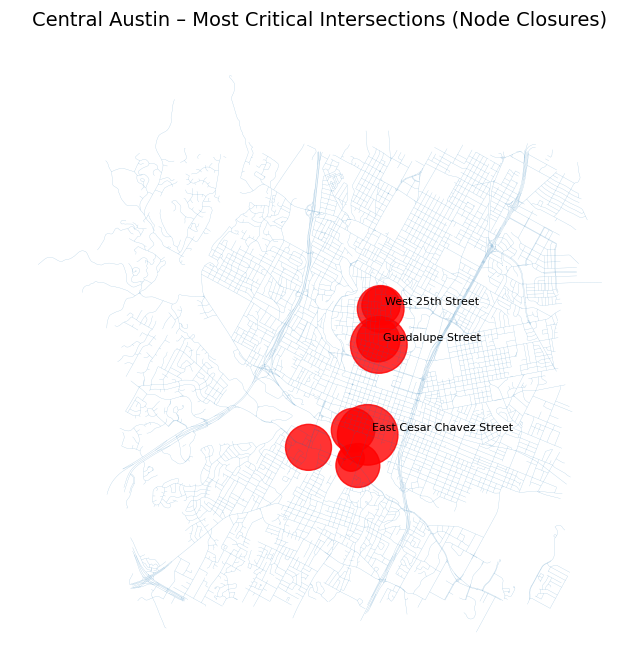

In [394]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8, 8))

# 1) background road network (thin, light)
roads_3857.plot(ax=ax, linewidth=0.2, alpha=0.4)

# 2) overlay the top critical intersections (bigger points)
# size them by efficiency drop or betweenness
sizes = 50 + 400 * top_nodes_gdf["eff_drop_pct"]  # tweak the scaling if needed

top_nodes_gdf.plot(
    ax=ax,
    markersize=sizes,
    color="red",
    alpha=0.8,
)

for _, row in top_nodes_gdf.head(3).iterrows():
    x, y = row.geometry.x, row.geometry.y
    ax.annotate(
        row["road_name"],
        xy=(x, y),
        xytext=(3, 3),
        textcoords="offset points",
        fontsize=8,
    )


ax.set_title("Central Austin – Most Critical Intersections (Node Closures)", fontsize=14)
ax.set_axis_off()

plt.show()


### Edge Closure

In [462]:
import random

# Set a seed (or reuse the SEED you already have)
SEED = 0

def sample_pairs(G, n_pairs=3000, seed=SEED):
    """
    Randomly sample node pairs (u, v) from graph G for efficiency approximation.
    """
    random.seed(seed)
    nodes = sorted(G.nodes())
    if len(nodes) < 2:
        raise ValueError("Graph must have at least 2 nodes.")
    return [tuple(random.sample(nodes, 2)) for _ in range(n_pairs)]

def approximate_efficiency_from_pairs(G, pairs, weight="travel_time_s"):
    """
    Approximate global efficiency using a fixed list of node pairs.
    Efficiency = average of 1 / shortest_path_length over these pairs.
    """
    inv_d_sum = 0.0
    count = 0

    for u, v in pairs:
        # Skip pairs involving nodes that are gone (after removals)
        if (u not in G) or (v not in G):
            continue

        try:
            d = nx.shortest_path_length(G, u, v, weight=weight)
            if d > 0:
                inv_d_sum += 1.0 / d
                count += 1
        except nx.NetworkXNoPath:
            # disconnected after removals
            continue

    return inv_d_sum / count if count > 0 else 0.0


In [474]:
# Sample pairs once for the Austin graph
pairs_for_edges_austin = sample_pairs(G_main, n_pairs=3000, seed=SEED)

# Baseline efficiency for these pairs
E_base_edges_austin = approximate_efficiency_from_pairs(
    G_main,
    pairs_for_edges_austin,
    weight="travel_time_s"
)
print("Baseline approximate efficiency (Austin, pair-based):", E_base_edges_austin)


Baseline approximate efficiency (Austin, pair-based): 0.004236574481882993


In [478]:
import random

class SeqRandom(random.Random):
    def sample(self, population, k, counts=None):
        # convert population (like G.nodes()) to a list first
        return super().sample(list(population), k, counts=counts)

SEED = 0
rng_austin = SeqRandom(SEED)


t0 = time.perf_counter()

print("Computing edge betweenness centrality (Austin)...")

edge_btw_austin = nx.edge_betweenness_centrality(
    G_main,
    k=min(500, G_main.number_of_nodes()),  # sampled for speed
    weight="travel_time_s",
    seed=rng_austin          # <-- use the SeqRandom instance here
)

print("Sampling node pairs and computing baseline efficiency (pair-based)...")
pairs_for_edges_austin = sample_pairs(G_main, n_pairs=1000, seed=SEED)

E_base_edges_austin = approximate_efficiency_from_pairs(
    G_main,
    pairs_for_edges_austin,
    weight="travel_time_s"
)

print("Baseline approximate efficiency (Austin, pair-based):", E_base_edges_austin)

t1 = time.perf_counter()
print(f"Betweenness + baseline step took {t1 - t0:.2f} seconds")


Computing edge betweenness centrality (Austin)...
Sampling node pairs and computing baseline efficiency (pair-based)...
Baseline approximate efficiency (Austin, pair-based): 0.004033559037319127
Betweenness + baseline step took 41.76 seconds


In [480]:
def edge_closure_impact_with_roadname_austin_pairs(
    G,
    edge_btw,
    E_base,
    roads_gdf,
    pairs,
    k=10
):
    """
    For the top-k edges by edge betweenness:
    - remove each edge
    - recompute approximate efficiency with approximate_efficiency_from_pairs
    - record % drop (eff_drop_pct)
    - attach nearest road_name for interpretation
    """
    # 1) Top-k edges by betweenness
    top_items = sorted(edge_btw.items(), key=lambda x: x[1], reverse=True)[:k]
    top_edges = [e for e, _ in top_items]
    top_scores = [b for _, b in top_items]

    # 2) Midpoints for spatial join to get road names
    midpoints = [
        Point((u[0] + v[0]) / 2.0, (u[1] + v[1]) / 2.0)
        for (u, v) in top_edges
    ]
    gdf_mid = gpd.GeoDataFrame(
        {"edge": top_edges, "betweenness": top_scores},
        geometry=midpoints,
        crs="EPSG:3857"
    )

    # 3) Join to nearest road to get road_name
    joined = gpd.sjoin_nearest(
        gdf_mid,
        roads_gdf[[road_name_col, "geometry"]],
        how="left",
        distance_col="dist",
        max_distance=50
    )

    results = []
    for idx, row in joined.iterrows():
        (u, v) = row["edge"]
        bscore = row["betweenness"]
        road_name = row.get(road_name_col)
        if not isinstance(road_name, str) or not road_name:
            road_name = "Unnamed road"

        # 4) Remove this edge and measure efficiency drop
        G_tmp = G.copy()
        if G_tmp.has_edge(u, v):
            G_tmp.remove_edge(u, v)
            E_after = approximate_efficiency_from_pairs(
                G_tmp,
                pairs,
                weight="travel_time_s"
            )
            drop_pct = (E_base - E_after) / E_base * 100 if E_base > 0 else None
        else:
            E_after = None
            drop_pct = None

        results.append(((u, v), bscore, E_after, drop_pct, road_name))

    df = pd.DataFrame(
        results,
        columns=["edge", "betweenness", "efficiency_after", "eff_drop_pct", "road_name"]
    )

    # also make it a GeoDataFrame with midpoint geometry (handy for plotting)
    df_gdf = gpd.GeoDataFrame(
        df,
        geometry=[
            Point((u[0] + v[0]) / 2.0, (u[1] + v[1]) / 2.0)
            for (u, v) in df["edge"]
        ],
        crs="EPSG:3857"
    )

    return df_gdf


In [534]:
t0 = time.perf_counter()

# k = how many top edges you want to evaluate
k_edges = 50  # you can set 10, 20, 50 etc.

edge_impact_austin_pairs = edge_closure_impact_with_roadname_austin_pairs(
    G=G_main,
    edge_btw=edge_btw_austin,
    E_base=E_base_edges_austin,
    roads_gdf=roads_3857,
    pairs=pairs_for_edges_austin,
    k=k_edges
)

edge_table_austin_pairs = (
    edge_impact_austin_pairs[["road_name", "from_intersection",
            "to_intersection", "betweenness", "efficiency_after", "eff_drop_pct"]]
    .sort_values("eff_drop_pct", ascending=False)
    .reset_index(drop=True)
)

t1 = time.perf_counter()
print(f"Edge closure analysis (Austin, pair-based) took {t1 - t0:.2f} seconds")

edge_table_austin_pairs.head(10)


Edge closure analysis (Austin, pair-based) took 363.02 seconds


,road_name,from_intersection,to_intersection,betweenness,efficiency_after,eff_drop_pct
0,Guadalupe Street,Guadalupe Street & West 21st Street,Guadalupe Street,0.008028,0.004000,0.831284
1,Guadalupe Street,Guadalupe Street,Guadalupe Street & West 20th Street,0.008020,0.004000,0.831284
2,West Cesar Chavez Street,West Cesar Chavez Street,West Cesar Chavez Street,0.007684,0.004000,0.823952
3,West Cesar Chavez Street,West Cesar Chavez Street,West Cesar Chavez Street,0.007631,0.004000,0.823952
4,West Cesar Chavez Street,West Cesar Chavez Street,West Cesar Chavez Street,0.007658,0.004000,0.823952
5,East Cesar Chavez Street,East Cesar Chavez Street & Red River Street,East Cesar Chavez Street & Red River Street,0.007218,0.004012,0.545876
6,Guadalupe Street,Guadalupe Street,Guadalupe Street,0.007165,0.004012,0.534660
7,Guadalupe Street,Guadalupe Street & West 24th Street,Guadalupe Street,0.007177,0.004012,0.534660
8,Guadalupe Street,Guadalupe Street,Guadalupe Street & Inner Campus Drive & West 22nd Street,0.007154,0.004012,0.534660
9,Purple Heart Trail,Purple Heart Trail,Purple Heart Trail,0.009220,0.004012,0.533501


In [530]:
def edge_closure_impact_with_roadname_austin_pairs(
    G,
    edge_btw,
    E_base,
    roads_gdf,
    pairs,
    k=10
):
    """
    For the top-k edges by edge betweenness:
    - remove each edge
    - recompute approximate efficiency with approximate_efficiency_from_pairs
    - record % drop (eff_drop_pct)
    - attach nearest road_name
    - attach from_intersection / to_intersection labels
    """
    # 1) Top-k edges by betweenness
    top_items = sorted(edge_btw.items(), key=lambda x: x[1], reverse=True)[:k]
    top_edges = [e for e, _ in top_items]
    top_scores = [b for _, b in top_items]

    # 2) Midpoints for spatial join to get road names
    midpoints = [
        Point((u[0] + v[0]) / 2.0, (u[1] + v[1]) / 2.0)
        for (u, v) in top_edges
    ]
    gdf_mid = gpd.GeoDataFrame(
        {"edge": top_edges, "betweenness": top_scores},
        geometry=midpoints,
        crs="EPSG:3857"
    )

    # 3) Join to nearest road to get road_name
    joined = gpd.sjoin_nearest(
        gdf_mid,
        roads_gdf[[road_name_col, "geometry"]],
        how="left",
        distance_col="dist",
        max_distance=50
    )

    results = []
    for idx, row in joined.iterrows():
        (u, v) = row["edge"]
        bscore = row["betweenness"]
        road_name = row.get(road_name_col)
        if not isinstance(road_name, str) or not road_name:
            road_name = "Unnamed road"

        # 4) Remove this edge and measure efficiency drop
        G_tmp = G.copy()
        if G_tmp.has_edge(u, v):
            G_tmp.remove_edge(u, v)
            E_after = approximate_efficiency_from_pairs(
                G_tmp,
                pairs,
                weight="travel_time_s"
            )
            drop_pct = (E_base - E_after) / E_base * 100 if E_base > 0 else None
        else:
            E_after = None
            drop_pct = None

        # 5) Label endpoints as intersections
        pt_u = Point(u)
        pt_v = Point(v)
        from_intersection = get_intersection_names(pt_u, roads_gdf, radius=30)
        to_intersection   = get_intersection_names(pt_v, roads_gdf, radius=30)

        results.append((
            (u, v),
            from_intersection,
            to_intersection,
            bscore,
            E_after,
            drop_pct,
            road_name
        ))

    df = pd.DataFrame(
        results,
        columns=[
            "edge",
            "from_intersection",
            "to_intersection",
            "betweenness",
            "efficiency_after",
            "eff_drop_pct",
            "road_name"
        ]
    )

    # also make it a GeoDataFrame with midpoint geometry (handy for plotting)
    df_gdf = gpd.GeoDataFrame(
        df,
        geometry=[
            Point((u[0] + v[0]) / 2.0, (u[1] + v[1]) / 2.0)
            for (u, v) in df["edge"]
        ],
        crs="EPSG:3857"
    )

    return df_gdf


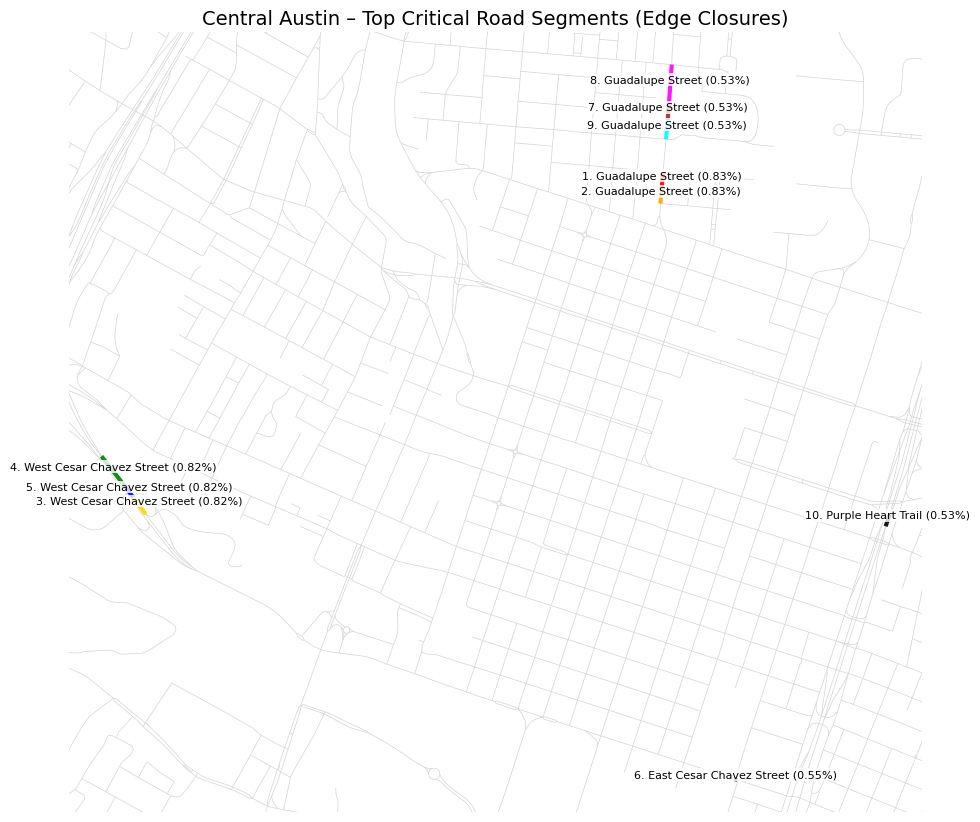

In [484]:
from shapely.geometry import LineString
import geopandas as gpd
import matplotlib.pyplot as plt

# ==========================
# Map: Top critical road segments (Austin – edge closures)
# ==========================

K = 10  # how many critical segments to display

# Take top-K by efficiency drop
crit_edges = (
    edge_impact_austin_pairs
    .sort_values("eff_drop_pct", ascending=False)
    .head(K)
    .copy()
)

# Build line geometry for each critical edge (u, v)
crit_edges["geometry"] = crit_edges["edge"].apply(
    lambda uv: LineString([uv[0], uv[1]])
)

gdf_crit_edges = gpd.GeoDataFrame(
    crit_edges,
    geometry="geometry",
    crs="EPSG:3857"
)

fig, ax = plt.subplots(figsize=(11, 11))

# Background roads
roads_3857.plot(ax=ax, color="lightgray", linewidth=0.5)

# Color palette, cycled if K > len(colors)
colors = [
    "red", "orange", "gold", "green", "blue",
    "purple", "brown", "magenta", "cyan", "black"
]

# Rank segments by eff_drop_pct
gdf_crit_edges = gdf_crit_edges.sort_values("eff_drop_pct", ascending=False).reset_index(drop=True)
gdf_crit_edges["rank"] = gdf_crit_edges.index + 1
gdf_crit_edges["color"] = [
    colors[(r - 1) % len(colors)] for r in gdf_crit_edges["rank"]
]

# Plot each critical edge and label it
for _, row in gdf_crit_edges.iterrows():
    gpd.GeoDataFrame([row], geometry="geometry", crs="EPSG:3857").plot(
        ax=ax,
        color=row["color"],
        linewidth=3,
        alpha=0.9
    )
    x, y = row.geometry.centroid.x, row.geometry.centroid.y
    label = f"{row['rank']}. {row['road_name']} ({row['eff_drop_pct']:.2f}%)"
    ax.text(
        x, y,
        label,
        fontsize=8,
        ha="center",
        va="bottom",
        bbox=dict(facecolor="white", edgecolor="none", alpha=0.8, pad=1.0)
    )

# Zoom to area containing the critical edges
minx, miny, maxx, maxy = gdf_crit_edges.total_bounds
pad = 150  # meters
ax.set_xlim(minx - pad, maxx + pad)
ax.set_ylim(miny - pad, maxy + pad)

ax.set_title("Central Austin – Top Critical Road Segments (Edge Closures)", fontsize=14)
ax.set_axis_off()

plt.show()


### Robustness

In [412]:
# ==========================
# Helper: approximate efficiency from fixed node pairs
# ==========================

def approximate_efficiency_from_pairs(G, pairs, weight="travel_time_s"):
    """
    Approximate global efficiency using a fixed list of node pairs.
    """
    inv_d_sum = 0.0
    count = 0

    for u, v in pairs:
        if (u not in G) or (v not in G):
            continue
        try:
            d = nx.shortest_path_length(G, u, v, weight=weight)
            if d > 0:
                inv_d_sum += 1.0 / d
                count += 1
        except nx.NetworkXNoPath:
            continue

    return inv_d_sum / count if count > 0 else 0.0


In [419]:
# ==========================
# Failure curves: targeted vs random edges
# ==========================

SEED = 0

def simulate_failure_curves(
    G,
    edge_btw,
    max_remove=10,
    n_runs=10,
    n_pairs=400,
    weight="travel_time_s",
    seed=SEED,
):
    random.seed(seed)
    np.random.seed(seed)

    edges = sorted(G.edges())
    m = len(edges)
    max_remove = min(max_remove, m)

    # targeted order: highest edge betweenness first
    targeted_edges = [e for e, _ in sorted(edge_btw.items(),
                                           key=lambda x: x[1],
                                           reverse=True)]

    # sample node pairs once
    nodes = sorted(G.nodes())
    if len(nodes) < 2:
        raise ValueError("Graph must have at least 2 nodes.")
    pairs = [tuple(random.sample(nodes, 2)) for _ in range(n_pairs)]

    # baseline efficiency
    E0 = approximate_efficiency_from_pairs(G, pairs, weight=weight)

    # targeted removal curve
    G_tar = G.copy()
    E_targeted = [E0]
    for k in range(1, max_remove + 1):
        e = targeted_edges[k - 1]
        if G_tar.has_edge(*e):
            G_tar.remove_edge(*e)
        E_targeted.append(approximate_efficiency_from_pairs(G_tar, pairs, weight=weight))

    # random removal curves
    E_random_all = np.zeros((n_runs, max_remove + 1))
    for r in range(n_runs):
        G_rand = G.copy()
        order = edges.copy()
        np.random.shuffle(order)
        E_random_all[r, 0] = E0
        for k in range(1, max_remove + 1):
            e = order[k - 1]
            if G_rand.has_edge(*e):
                G_rand.remove_edge(*e)
            E_random_all[r, k] = approximate_efficiency_from_pairs(G_rand, pairs, weight=weight)

    E_random_mean = E_random_all.mean(axis=0)
    E_random_std = E_random_all.std(axis=0)
    ks = np.arange(0, max_remove + 1)

    return pd.DataFrame({
        "k_removed": ks,
        "E_targeted": E_targeted,
        "E_random_mean": E_random_mean,
        "E_random_std": E_random_std
    })

failure_curves_austin = simulate_failure_curves(
    G_main,
    edge_btw,
    max_remove=5,
    n_runs=10,
    n_pairs=1000,
    weight="travel_time_s",
    seed=SEED
)

failure_curves_austin.head()


,k_removed,E_targeted,E_random_mean,E_random_std
0,0,0.004034,0.004034,0.000000
1,1,0.004023,0.004034,0.000002
2,2,0.004023,0.004034,0.000003
3,3,0.004018,0.004032,0.000004
4,4,0.003996,0.004031,0.000004


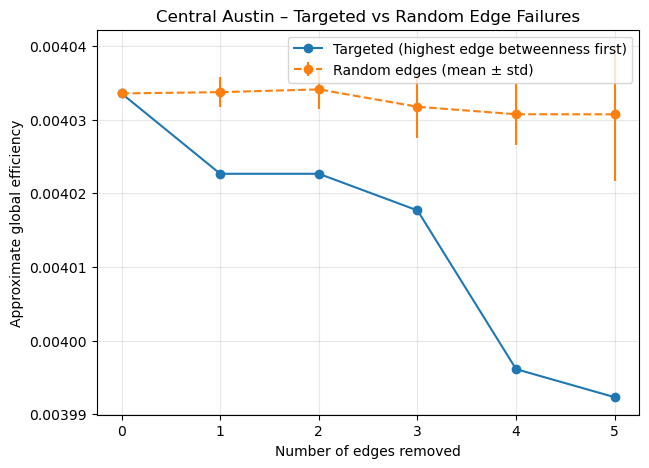

In [421]:
# ==========================
# Plot failure curves
# ==========================

fig, ax = plt.subplots(figsize=(7, 5))

ax.plot(
    failure_curves_austin["k_removed"],
    failure_curves_austin["E_targeted"],
    marker="o",
    label="Targeted (highest edge betweenness first)"
)

ax.errorbar(
    failure_curves_austin["k_removed"],
    failure_curves_austin["E_random_mean"],
    yerr=failure_curves_austin["E_random_std"],
    marker="o",
    linestyle="--",
    label="Random edges (mean ± std)"
)

ax.set_xlabel("Number of edges removed")
ax.set_ylabel("Approximate global efficiency")
ax.set_title("Central Austin – Targeted vs Random Edge Failures")
ax.legend()
ax.grid(True, alpha=0.3)

plt.show()


## Question 3

In [518]:
import pandas as pd

# Corridor ranking for Austin:
# for each road_name, take the max eff_drop_pct among its segments
road_rank_austin = (
    edge_table_austin_pairs
    .groupby("road_name", as_index=False)["eff_drop_pct"]
    .max()
    .sort_values("eff_drop_pct", ascending=False)
    .reset_index(drop=True)
)

road_rank_austin.head(10)


,road_name,eff_drop_pct
0,Guadalupe Street,0.831284
1,West Cesar Chavez Street,0.823952
2,East Cesar Chavez Street,0.545876
3,Purple Heart Trail,0.533501
4,Unnamed road,0.445370
5,North Lamar Boulevard,0.326562
6,Lavaca Street,0.164008


In [522]:
top10_segments_austin = (
    edge_impact_austin_pairs
    .sort_values("eff_drop_pct", ascending=False)
    .head(10)
    .copy()
)

top10_segments_austin[
    ["road_name", "betweenness", "eff_drop_pct"]
]

closed_edges_top10 = top10_segments_austin["edge"].tolist()
print("Number of closed segments:", len(closed_edges_top10))


Number of closed segments: 10


In [526]:
pairs_for_recovery_austin = sample_pairs(G_main, n_pairs=3000, seed=SEED)

def greedy_repair_order_austin_pairs(
    G_base,
    closed_edges,
    roads_gdf,
    pairs,
    weight="travel_time_s"
):
    G_damaged = G_base.copy()
    for (u, v) in closed_edges:
        if G_damaged.has_edge(u, v):
            G_damaged.remove_edge(u, v)

    E_damaged = approximate_efficiency_from_pairs(G_damaged, pairs, weight=weight)
    print("Damaged efficiency (pair-based):", E_damaged)

    remaining = list(closed_edges)
    repair_results = []
    current_graph = G_damaged
    current_eff = E_damaged
    step = 1

    while remaining:
        best_edge = None
        best_eff = -1.0

        for (u, v) in remaining:
            if current_graph.has_edge(u, v):
                continue
            G_tmp = current_graph.copy()
            if G_base.has_edge(u, v):
                data = G_base[u][v]
                G_tmp.add_edge(u, v, **data)
            else:
                continue

            E_after = approximate_efficiency_from_pairs(G_tmp, pairs, weight=weight)
            if E_after > best_eff:
                best_eff = E_after
                best_edge = (u, v)

        if best_edge is None:
            break

        (bu, bv) = best_edge
        if G_base.has_edge(bu, bv):
            current_graph.add_edge(bu, bv, **G_base[bu][bv])
        current_eff = best_eff

        midpoint = Point((bu[0] + bv[0]) / 2.0, (bu[1] + bv[1]) / 2.0)
        gdf_mid = gpd.GeoDataFrame(
            {"step": [step]},
            geometry=[midpoint],
            crs="EPSG:3857"
        )

        if road_name_col is not None:
            match = gpd.sjoin_nearest(
                gdf_mid,
                roads_gdf[[road_name_col, "geometry"]],
                how="left",
                distance_col="dist",
                max_distance=50
            ).iloc[0]
            if pd.notna(match[road_name_col]):
                road_name = match[road_name_col]
            else:
                road_name = "Unnamed road"
        else:
            road_name = "Unknown road"

        gain_pct = (
            (current_eff - E_damaged) / E_damaged * 100
            if E_damaged > 0 else 0.0
        )

        repair_results.append({
            "step": step,
            "edge": best_edge,
            "road_name": road_name,
            "efficiency_after": current_eff,
            "gain_pct_vs_damaged": gain_pct
        })

        remaining.remove(best_edge)
        print(f"Step {step}: reopen {road_name}, gain {gain_pct:.2f}%")
        step += 1

    return pd.DataFrame(repair_results)

t0 = time.perf_counter()
repair_table_austin_pairs = greedy_repair_order_austin_pairs(
    G_base=G_main,
    closed_edges=closed_edges_top10,
    roads_gdf=roads_3857,
    pairs=pairs_for_recovery_austin,
    weight="travel_time_s"
)
t1 = time.perf_counter()
print(f"Greedy repair (Austin, top 10) took {t1 - t0:.2f} seconds")

repair_table_austin_pairs


Damaged efficiency (pair-based): 0.004132636426114318
Step 1: reopen East Cesar Chavez Street, gain 0.57%
Step 2: reopen Purple Heart Trail, gain 1.13%
Step 3: reopen West Cesar Chavez Street, gain 1.16%
Step 4: reopen Guadalupe Street, gain 1.16%
Step 5: reopen Guadalupe Street, gain 1.50%
Step 6: reopen West Cesar Chavez Street, gain 1.50%
Step 7: reopen West Cesar Chavez Street, gain 2.10%
Step 8: reopen Guadalupe Street, gain 2.10%
Step 9: reopen Guadalupe Street, gain 2.11%
Step 10: reopen Guadalupe Street, gain 2.52%
Greedy repair (Austin, top 10) took 1224.96 seconds


,step,edge,road_name,efficiency_after,gain_pct_vs_damaged
0,1,"((-10880252.348795144, 3537251.4413457504), (-10880237.187080499, 3537246.5567161785))",East Cesar Chavez Street,0.004156,0.568888
1,2,"((-10879544.902299203, 3538429.4911985276), (-10879525.94458992, 3538485.5989117017))",Purple Heart Trail,0.004179,1.127277
2,3,"((-10883093.834457386, 3538616.0925199953), (-10883203.328308532, 3538756.383672844))",West Cesar Chavez Street,0.004181,1.164629
3,4,"((-10880583.435224662, 3540082.536746914), (-10880590.158921905, 3540001.2071126457))",Guadalupe Street,0.004181,1.164629
4,5,"((-10880590.158921905, 3540001.2071126457), (-10880595.580181107, 3539935.25688497))",Guadalupe Street,0.004194,1.495151
5,6,"((-10882996.808389211, 3538485.5215749163), (-10883055.273385776, 3538564.0702129705))",West Cesar Chavez Street,0.004194,1.495151
6,7,"((-10883055.273385776, 3538564.0702129705), (-10883093.834457386, 3538616.0925199953))",West Cesar Chavez Street,0.004219,2.095511
7,8,"((-10880556.351192549, 3540395.9488446508), (-10880561.772451753, 3540325.007609595))",Guadalupe Street,0.004219,2.095511
8,9,"((-10880561.772451753, 3540325.007609595), (-10880569.66500365, 3540235.284211483))",Guadalupe Street,0.004220,2.105303
9,10,"((-10880542.870402215, 3540583.5073721968), (-10880556.351192549, 3540395.9488446508))",Guadalupe Street,0.004237,2.515054


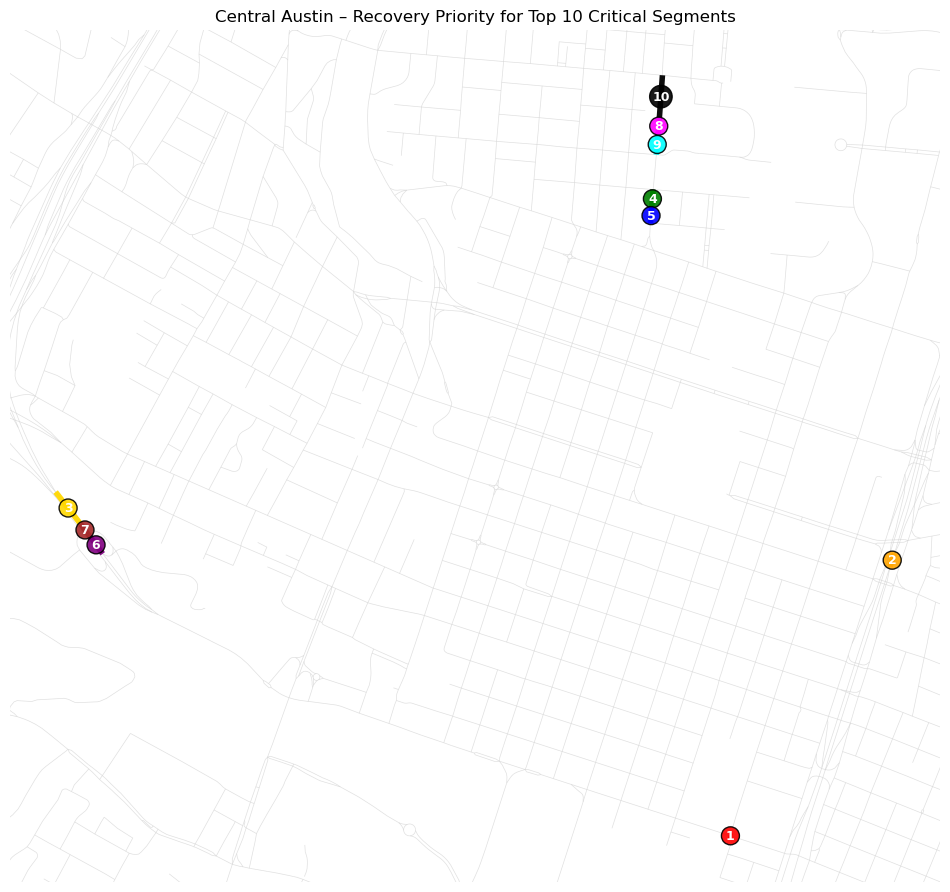

In [527]:
# If you only want first k steps, change k_show
k_show = len(repair_table_austin_pairs)

repair_segments = repair_table_austin_pairs.head(k_show).copy()
repair_segments["geometry"] = repair_segments["edge"].apply(
    lambda uv: LineString([uv[0], uv[1]])
)

gdf_repair = gpd.GeoDataFrame(
    repair_segments,
    geometry="geometry",
    crs="EPSG:3857"
)

fig, ax = plt.subplots(figsize=(12, 12))

roads_3857.plot(
    ax=ax,
    color="lightgray",
    linewidth=0.5,
    alpha=0.7
)

colors = [
    "red", "orange", "gold", "green", "blue",
    "purple", "brown", "magenta", "cyan", "black"
]

gdf_repair["color"] = gdf_repair["step"].apply(
    lambda s: colors[(s - 1) % len(colors)]
)

for _, row in gdf_repair.iterrows():
    gpd.GeoDataFrame([row], geometry="geometry", crs="EPSG:3857").plot(
        ax=ax,
        color=row["color"],
        linewidth=4,
        alpha=0.95,
        zorder=3
    )
    cx, cy = row.geometry.centroid.x, row.geometry.centroid.y
    ax.text(
        cx, cy,
        str(row["step"]),
        fontsize=9,
        ha="center",
        va="center",
        color="white",
        weight="bold",
        zorder=4,
        bbox=dict(
            facecolor=row["color"],
            edgecolor="black",
            alpha=0.9,
            boxstyle="circle,pad=0.2"
        )
    )

minx, miny, maxx, maxy = gdf_repair.total_bounds
pad = 200
ax.set_xlim(minx - pad, maxx + pad)
ax.set_ylim(miny - pad, maxy + pad)

ax.set_title("Central Austin – Recovery Priority for Top 10 Critical Segments")
ax.set_axis_off()

plt.show()
